In [173]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [174]:
# Load the dataset
df = pd.read_csv("bank-additional.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


<Axes: >

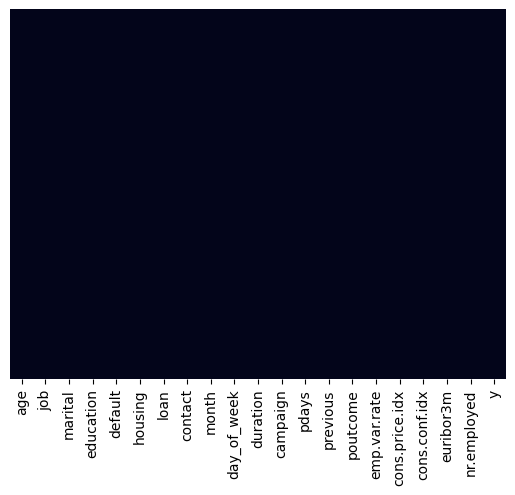

In [176]:
# Check for missing values
print(df.isnull().sum())
df = df.dropna()
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [177]:
# Convert categorical variables using LabelEncoder
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   int64  
 2   marital         4119 non-null   int64  
 3   education       4119 non-null   int64  
 4   default         4119 non-null   int64  
 5   housing         4119 non-null   int64  
 6   loan            4119 non-null   int64  
 7   contact         4119 non-null   int64  
 8   month           4119 non-null   int64  
 9   day_of_week     4119 non-null   int64  
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   int64  
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [179]:
# Split the data into features and target
X=df.drop(columns='y')
y = df['y']

In [180]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [181]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [182]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [183]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
  'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[None, 3, 4, 5, 10],
  'max_features': [None, 'sqrt', 'log2']
}

In [184]:
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}


In [185]:
best_score = grid_search.best_score_
print("Best Cross-Validated Score:", best_score)

Best Cross-Validated Score: 0.9112019786250721


In [186]:
# Evaluate the Model
y_pred = best_dt_classifier.predict(X_test)

In [187]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.901294498381877


In [188]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1105
           1       0.54      0.48      0.51       131

    accuracy                           0.90      1236
   macro avg       0.74      0.72      0.73      1236
weighted avg       0.90      0.90      0.90      1236



In [189]:
# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[1051   54]
 [  68   63]]


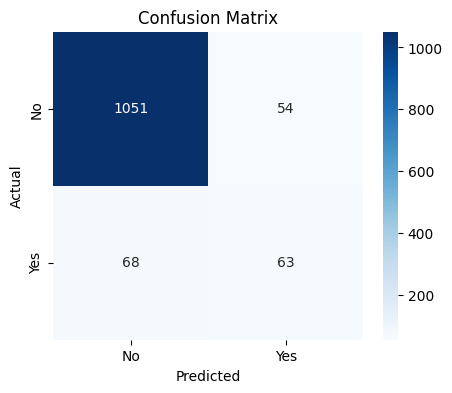

In [190]:
class_names = ['No', 'Yes']
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

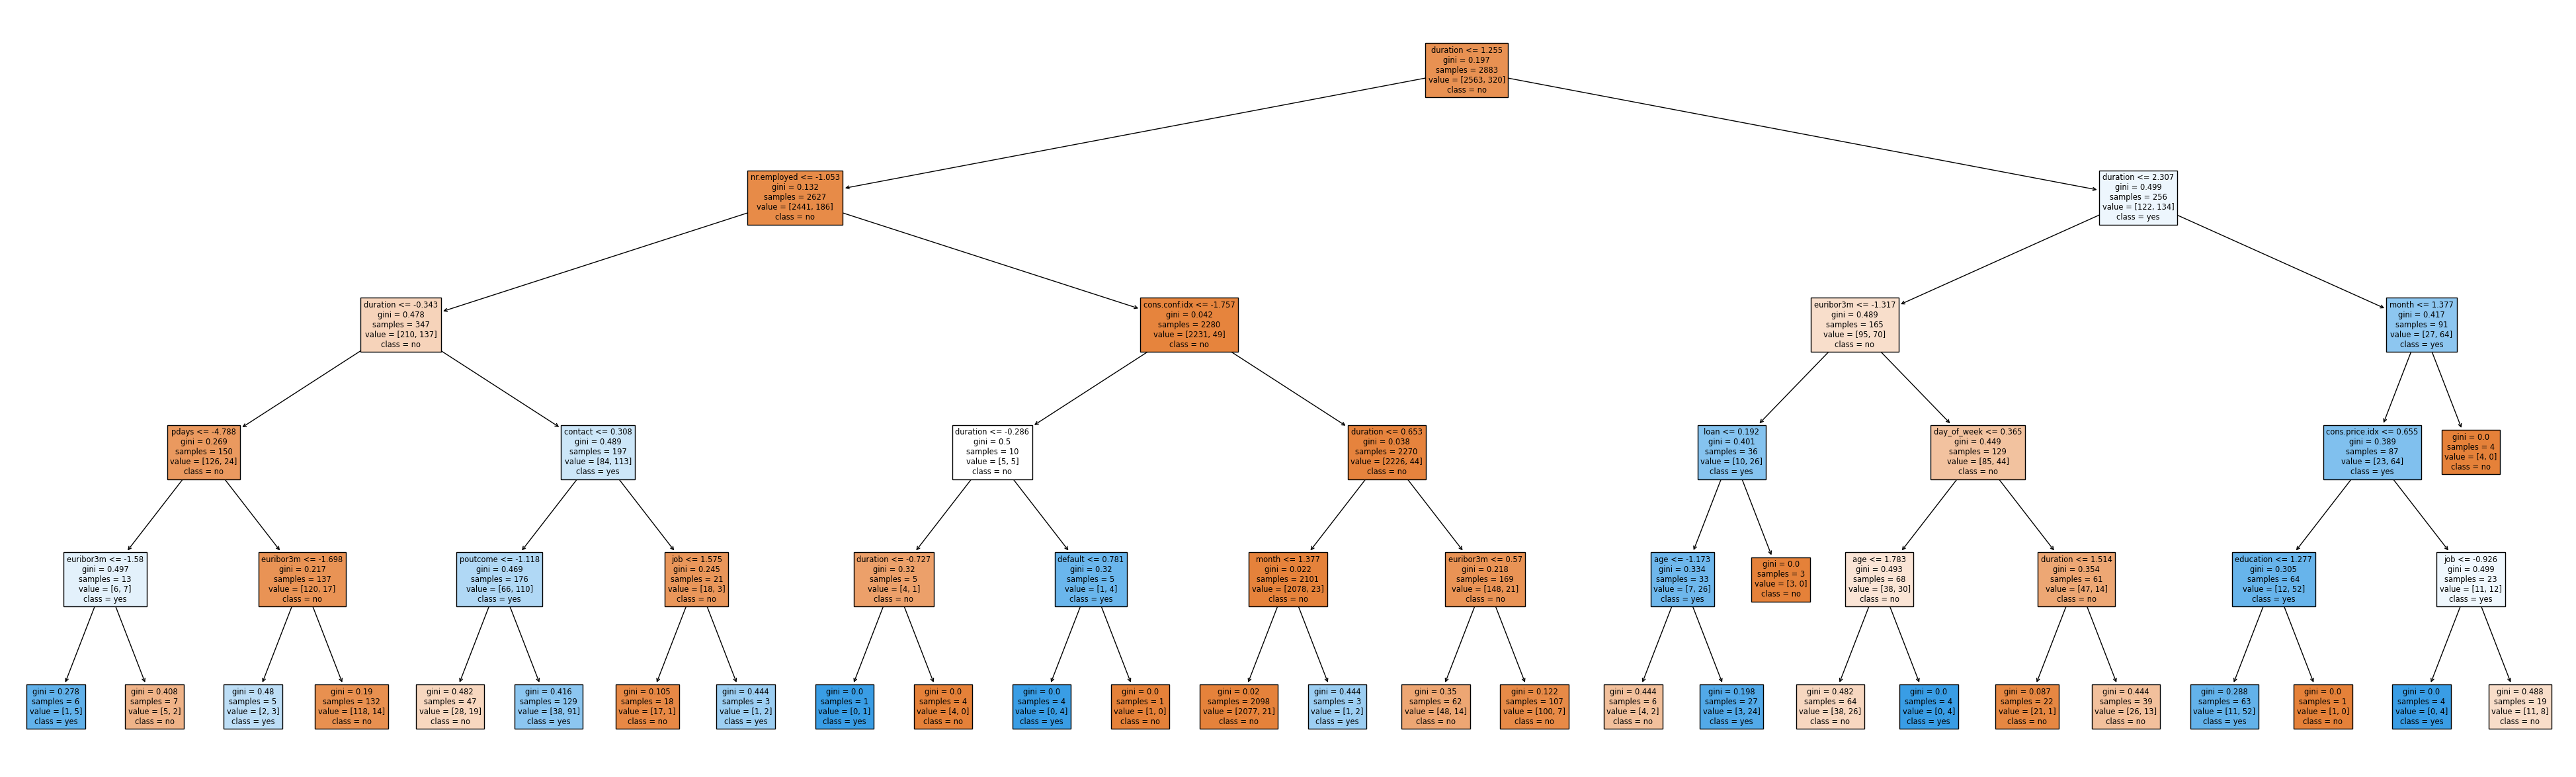

In [191]:
# Plot the decision tree
plt.figure(figsize=(50,15))
tree.plot_tree(best_dt_classifier, filled=True, class_names=['no', 'yes'], feature_names=X.columns)
plt.show()